# Data Analysis Project

This notebook demonstrates a sample data visualization that can be embedded in your Quarto website.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

## Sample Data Visualization

Let's create some sample data and visualize it:

In [2]:
# Generate sample data
np.random.seed(42)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sales = np.random.randint(50, 150, size=12)
expenses = np.random.randint(30, 100, size=12)

# Create DataFrame
df = pd.DataFrame({
    'Month': months,
    'Sales': sales,
    'Expenses': expenses
})

df['Profit'] = df['Sales'] - df['Expenses']
df

,Month,Sales,Expenses,Profit
0,Jan,101,53,48
1,Feb,142,32,110
2,Mar,64,51,13
3,Apr,121,82,39
4,May,110,31,79
5,Jun,70,59,11
6,Jul,132,67,65
7,Aug,136,31,105
8,Sep,124,93,31
9,Oct,124,89,35


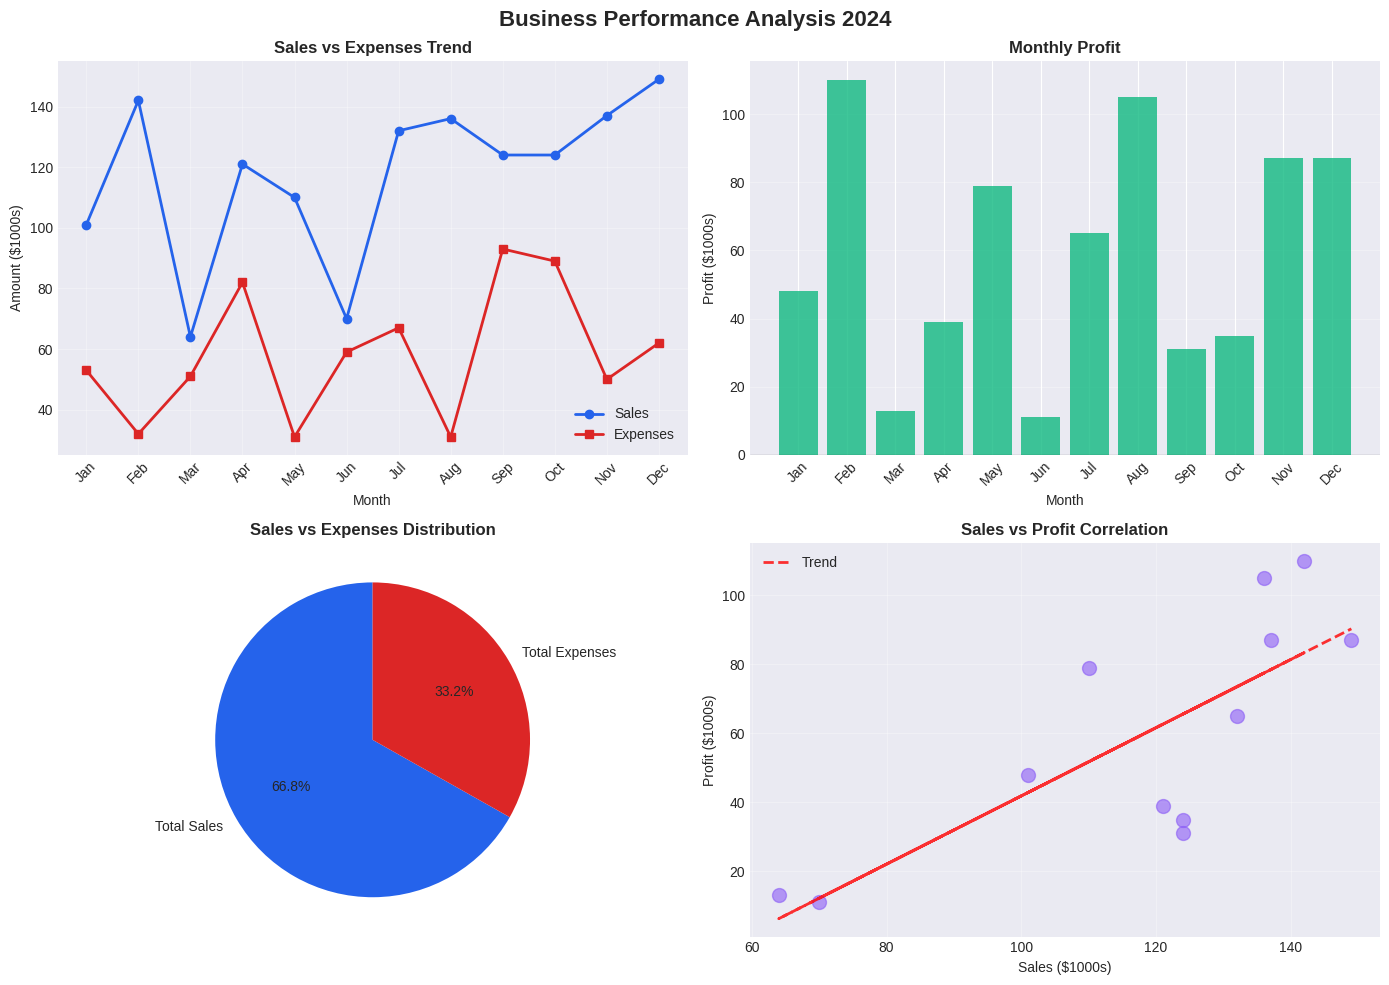

In [3]:
# Create a comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Business Performance Analysis 2024', fontsize=16, fontweight='bold')

# Plot 1: Line chart - Sales and Expenses over time
axes[0, 0].plot(df['Month'], df['Sales'], marker='o', linewidth=2, label='Sales', color='#2563eb')
axes[0, 0].plot(df['Month'], df['Expenses'], marker='s', linewidth=2, label='Expenses', color='#dc2626')
axes[0, 0].set_title('Sales vs Expenses Trend', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Amount ($1000s)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Bar chart - Monthly profit
colors = ['#10b981' if x > 0 else '#ef4444' for x in df['Profit']]
axes[0, 1].bar(df['Month'], df['Profit'], color=colors, alpha=0.8)
axes[0, 1].set_title('Monthly Profit', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Profit ($1000s)')
axes[0, 1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
axes[0, 1].grid(True, alpha=0.3, axis='y')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Pie chart - Total distribution
totals = [df['Sales'].sum(), df['Expenses'].sum()]
labels = ['Total Sales', 'Total Expenses']
colors_pie = ['#2563eb', '#dc2626']
axes[1, 0].pie(totals, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors_pie)
axes[1, 0].set_title('Sales vs Expenses Distribution', fontsize=12, fontweight='bold')

# Plot 4: Scatter plot with trend line
x = np.arange(len(df))
axes[1, 1].scatter(df['Sales'], df['Profit'], s=100, alpha=0.6, color='#8b5cf6')
axes[1, 1].set_title('Sales vs Profit Correlation', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Sales ($1000s)')
axes[1, 1].set_ylabel('Profit ($1000s)')
axes[1, 1].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df['Sales'], df['Profit'], 1)
p = np.poly1d(z)
axes[1, 1].plot(df['Sales'], p(df['Sales']), "r--", alpha=0.8, linewidth=2, label='Trend')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

## Key Insights

From the analysis above, we can observe:

1. **Seasonal Trends**: Sales show variation throughout the year
2. **Profitability**: Most months show positive profit margins
3. **Correlation**: Strong positive correlation between sales and profit
4. **Cost Management**: Expenses remain relatively stable

## Next Steps

- Implement predictive modeling for future sales
- Analyze customer segmentation
- Optimize pricing strategy
- Reduce operational costs

In [4]:
# Summary statistics
print("=" * 50)
print("PERFORMANCE SUMMARY")
print("=" * 50)
print(f"Total Sales: ${df['Sales'].sum()},000")
print(f"Total Expenses: ${df['Expenses'].sum()},000")
print(f"Total Profit: ${df['Profit'].sum()},000")
print(f"Average Monthly Profit: ${df['Profit'].mean():.2f},000")
print(f"Best Month: {df.loc[df['Profit'].idxmax(), 'Month']} (${df['Profit'].max()},000)")
print(f"Worst Month: {df.loc[df['Profit'].idxmin(), 'Month']} (${df['Profit'].min()},000)")
print("=" * 50)

PERFORMANCE SUMMARY
Total Sales: $1410,000
Total Expenses: $700,000
Total Profit: $710,000
Average Monthly Profit: $59.17,000
Best Month: Feb ($110,000)
Worst Month: Jun ($11,000)
